In order to run this notebook on your local machine, you must have:

* [IPython Notebook](http://ipython.org) >= 4.0 
* [IPython Notebook extensions](https://github.com/ipython-contrib/IPython-notebook-extensions) - Used to embed Python variables in Markdown text!

In [5]:
%pylab inline
import warnings
warnings.simplefilter('ignore', Warning)
import pandas as pd
#style.use('ggplot')
import seaborn as sn 



Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_csv('./data/gapminder.csv')
df.index = df.country
del df['country']
df = df[['lifeexpectancy','incomeperperson','alcconsumption','co2emissions', 'employrate']]
df = df.convert_objects(convert_numeric=True)
corr = df.corr()

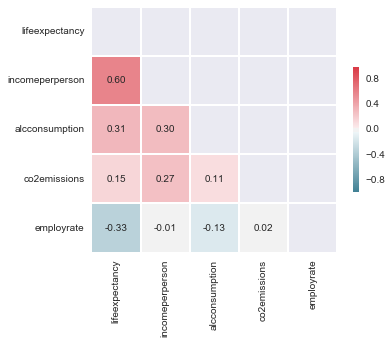

In [7]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11*.5, 9*.5))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, 
           annot=True, fmt='.2f' );

# Variables
## Response variable


1. Life expectancy
> 2011 life expectancy at birth (years)
The average number of years a newborn child would live if current
mortality patterns were to stay the same.

## Explanatory variables


1. Income per person
> 2010 Gross Domestic Product per capita in constant 2000 US$. The
inflation but not the differences in the cost of living between countries
has been taken into account.

1. Consumption of alcohol
> 2008 alcohol consumption per adult (age 15+), litres.
Recorded and estimated average alcohol consumption, adult (15+) per
capita consumption in litres pure alcohol.

1. CO2 emissions
> 2006 cumulative CO2 emission (metric tons), Total amount of CO2
emission in metric tons since 1751.

1. Employ rate
> 2007 total employees age 15+ (% of population)
Percentage of total population, age above 15, that has been employed
during the given year.


## Descriptive analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
lifeexpectancy     191 non-null float64
incomeperperson    190 non-null float64
alcconsumption     187 non-null float64
co2emissions       200 non-null float64
employrate         178 non-null float64
dtypes: float64(5)
memory usage: 10.0+ KB


In [9]:
df.describe()

,lifeexpectancy,incomeperperson,alcconsumption,co2emissions,employrate
count,191.000000,190.000000,187.000000,2.000000e+02,178.000000
mean,69.753524,8740.966076,6.689412,5.033262e+09,58.635955
std,9.708621,14262.809083,4.899617,2.573812e+10,10.519454
min,47.794000,103.775857,0.030000,1.320000e+05,32.000000
25%,64.447000,748.245151,2.625000,3.484617e+07,51.225000
50%,73.131000,2553.496056,5.920000,1.859018e+08,58.699999
75%,76.593000,9379.891165,9.925000,1.846084e+09,64.975000
max,83.394000,105147.437697,23.010000,3.342209e+11,83.199997


We see that this dataset has a total of {{df.shape[0]}} observations, each one corresponding to a country. Unfortunately, all variable has missing values. Given that each country is sovereign and theoretically independent from the others, we can't assume any way to fill in those missing values by avering neighbor countries, neither can we set zero values to them. So, in the sake of simplicity, we'll drop all contries with any missing values.

In [38]:
df = df.dropna()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Albania to Zimbabwe
Data columns (total 5 columns):
lifeexpectancy     160 non-null float64
incomeperperson    160 non-null float64
alcconsumption     160 non-null float64
co2emissions       160 non-null float64
employrate         160 non-null float64
dtypes: float64(5)
memory usage: 7.5+ KB


This management of the missing values lowered our set from 213 observations to {{df.shape[0]}}, nearly {{('{:.0f}%'.format((1-df.shape[0]/160 )*100))}}. Well, this is the way with trimming missing values.

In [10]:
df.describe()

,lifeexpectancy,incomeperperson,alcconsumption,co2emissions,employrate
count,191.000000,190.000000,187.000000,2.000000e+02,178.000000
mean,69.753524,8740.966076,6.689412,5.033262e+09,58.635955
std,9.708621,14262.809083,4.899617,2.573812e+10,10.519454
min,47.794000,103.775857,0.030000,1.320000e+05,32.000000
25%,64.447000,748.245151,2.625000,3.484617e+07,51.225000
50%,73.131000,2553.496056,5.920000,1.859018e+08,58.699999
75%,76.593000,9379.891165,9.925000,1.846084e+09,64.975000
max,83.394000,105147.437697,23.010000,3.342209e+11,83.199997


## Overview of the variables distribution

Let's take a loo, at the distribution of the selected variables. The `hist` method from `pandas.DataFrame` object comes in our help in plotting automatically histograms for all the variables within the dataframe object, and we just need do config the size and bins desired.

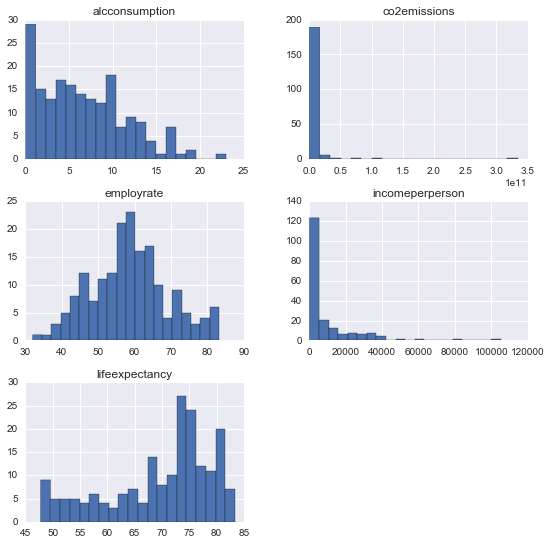

In [14]:
df.hist(bins=20, figsize=(9,9));

## Centering the variables

The image above shows that CO2 consumption and income per person variables are not fairly distributed along x axis, they're highly left skewed. Let's manage this data subtracting their respective means, namely, centering them.

In [25]:
dfmean = df - df.mean()

dfmean.describe()

,lifeexpectancy,incomeperperson,alcconsumption,co2emissions,employrate
count,1.910000e+02,1.900000e+02,1.870000e+02,2.000000e+02,1.780000e+02
mean,-6.063794e-15,-3.829451e-12,1.899847e-17,2.288818e-07,-2.474924e-15
std,9.708621e+00,1.426281e+04,4.899617e+00,2.573812e+10,1.051945e+01
min,-2.195952e+01,-8.637190e+03,-6.659412e+00,-5.033130e+09,-2.663596e+01
25%,-5.306524e+00,-7.992721e+03,-4.064412e+00,-4.998415e+09,-7.410955e+00
50%,3.377476e+00,-6.187470e+03,-7.694118e-01,-4.847360e+09,6.404377e-02
75%,6.839476e+00,6.389251e+02,3.235588e+00,-3.187177e+09,6.339045e+00
max,1.364048e+01,9.640647e+04,1.632059e+01,3.291876e+11,2.456404e+01


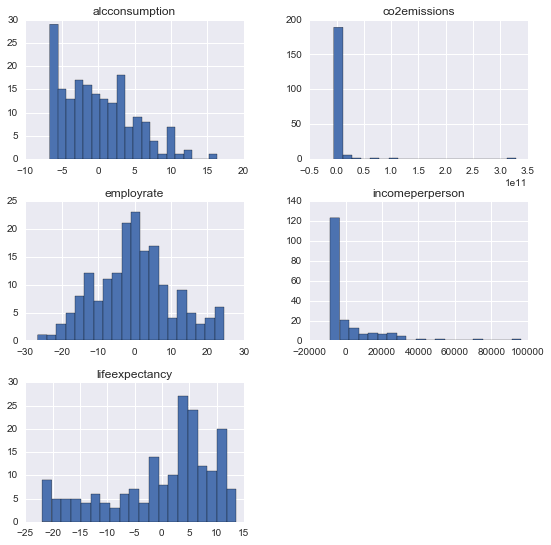

In [26]:
dfmean.hist(bins=20, figsize=(9,9));

It shouldn't be a surpise that the shape of the histograms didn't change at all, because centering a variable is just a linear transformation, centenring them around axis $x=0$, this don't work well for exponential distributinos though.